# Three-period Energy Management experiment

PH, 16 juin 2020

Power flow constraint:

$$ P_g = P_l + P_b $$

ESS dynamics:

$$E_b(k+1) = E_b(k+1) + (P_b(k)-loss(k))Δ_t$$

In [26]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [9]:
dt = 1. # hour
Emax = 1.5 # kWh

High-Low-High price scenario

In [2]:
cg = np.array([0.2, 0.1, 0.2])

In [5]:
Pl = np.array([0., 0., 1.])

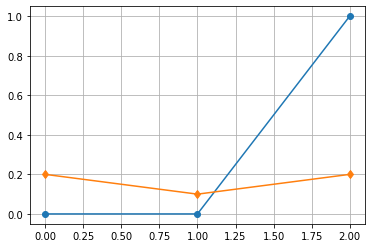

In [8]:
plt.plot(Pl, 'o-')
plt.plot(cg, 'd-')
plt.grid()

In [10]:
def loss0(Pb, Eb):
    return 0

In [11]:
a1 = 0.1
def loss1(Pb, Eb):
    return a1 * np.abs(Pb)

In [12]:
a2 = 0.2
def loss2(Pb, Eb):
    return a2 * Pb**2

## Exploration

using no solver, just studying the solution space

In [52]:
def eval_cost(Pg1, Pg2, loss):
    Pb = np.array([0., 0., 0.])
    Eb = np.array([0., 0., 0., 0.])
    Pg = np.array([Pg1, Pg2, 0.])
    for k in [0,1]:
        Pb[k] = Pg[k] - Pl[k]
        Eb[k+1] = Eb[k] + (Pb[k] - loss(Pb[k], Eb[k]))*dt
    # last instant: empty the storage
    def f(Pb, Eb, loss):
        E_next = Eb + (Pb - loss(Pb, Eb))*dt
        return E_next
    res = opt.root_scalar(f, args=(Eb[2],loss),
                          bracket=[-2*Eb[2]/dt, 0])
    Pb[2] = res.root
    Pg[2] = Pb[2] + Pl[2]
    
    return np.sum(cg * Pg), 

In [53]:
eval_cost(1, 0, loss0), \
eval_cost(1, 0, loss1), \
eval_cost(1/0.9, 0, loss1), \
eval_cost(1, 0, loss2), \
eval_cost(0.5, 0.5, loss2)

(0.2,
 0.23636363636363636,
 0.24040404040404043,
 0.2596875762567151,
 0.1942561475697998)

-0.7787192621510011